# Revisando datos de Quito

Los datos utilizados hasta este momento eran de Cuenca

In [1]:
import pandas as pd

In [13]:
dfQuito = pd.read_csv('/content/drive/MyDrive/DatosInvestigacion/preclean-data-El Camal.csv')

In [24]:
dfQuito.head(24)

,Unnamed: 0,Station,Date_time,CO,DIR,HUM,LLU,NO2,O3,PM2.5,PM10,PRE,RS,SO2,TMP,VEL
0,1,EL CAMAL,2004-01-01 00:00:00,3.96,253.95,76.89,0.0,NaN,90.85,NaN,NaN,725.21,23.69,8.17,12.57,1.86
1,2,EL CAMAL,2004-01-01 01:00:00,3.49,246.12,75.94,0.0,NaN,63.25,NaN,NaN,724.45,23.65,9.14,12.16,1.49
2,3,EL CAMAL,2004-01-01 02:00:00,1.78,256.44,76.08,0.0,NaN,20.68,NaN,NaN,724.10,23.76,8.61,11.87,1.83
3,4,EL CAMAL,2004-01-01 03:00:00,1.29,264.63,78.94,0.0,NaN,12.06,NaN,NaN,724.03,23.88,7.24,11.38,1.74
4,5,EL CAMAL,2004-01-01 04:00:00,0.90,211.47,79.83,0.0,NaN,12.64,NaN,NaN,724.22,23.98,6.30,11.31,3.34
5,6,EL CAMAL,2004-01-01 05:00:00,0.90,228.79,80.36,0.0,NaN,14.77,NaN,NaN,724.57,23.88,6.43,11.08,2.41
6,7,EL CAMAL,2004-01-01 06:00:00,0.71,207.43,75.40,0.0,NaN,19.28,NaN,NaN,725.27,25.75,6.18,11.45,3.25
7,8,EL CAMAL,2004-01-01 07:00:00,0.67,203.40,70.73,0.0,NaN,25.16,NaN,NaN,725.81,217.31,6.06,12.63,4.15
8,9,EL CAMAL,2004-01-01 08:00:00,0.73,217.99,64.73,0.0,NaN,31.28,NaN,NaN,726.09,437.87,6.45,14.36,3.88
9,10,EL CAMAL,2004-01-01 09:00:00,0.63,186.31,54.78,0.0,NaN,39.36,NaN,NaN,726.07,619.35,5.84,16.60,3.29


In [15]:
dfQuito.isna().sum()

Unnamed: 0         0
Station            0
Date_time          0
CO              3631
DIR             1033
HUM              452
LLU              537
NO2            36602
O3              3409
PM2.5           8840
PM10          107329
PRE              734
RS               429
SO2             3187
TMP              390
VEL             1035
dtype: int64

In [10]:
import missingno as msno

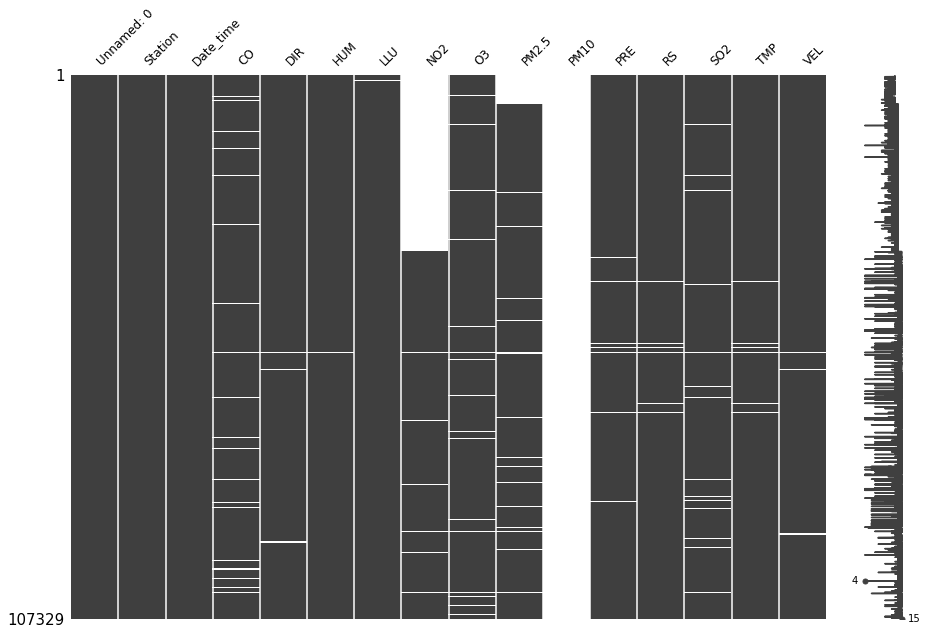

In [16]:
msno.matrix(dfQuito,figsize=(15,10), fontsize=12)

In [25]:
RS = dfQuito.iloc[:150]['RS']

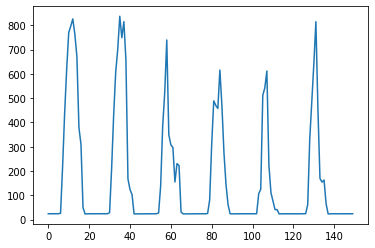

In [26]:
RS.plot()

In [27]:
VEL = dfQuito.iloc[:150]['VEL']

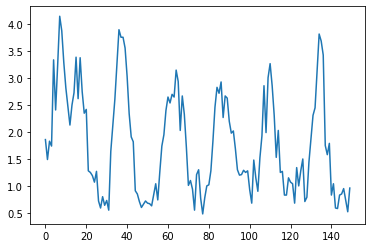

In [28]:
VEL.plot()

Se consiguen las variables que son comunes en ambos dataset

In [35]:
df_simple = dfQuito[['Date_time','RS','VEL','TMP','HUM']]

In [36]:
df_simple.head()

,Date_time,RS,VEL,TMP,HUM
0,2004-01-01 00:00:00,23.69,1.86,12.57,76.89
1,2004-01-01 01:00:00,23.65,1.49,12.16,75.94
2,2004-01-01 02:00:00,23.76,1.83,11.87,76.08
3,2004-01-01 03:00:00,23.88,1.74,11.38,78.94
4,2004-01-01 04:00:00,23.98,3.34,11.31,79.83


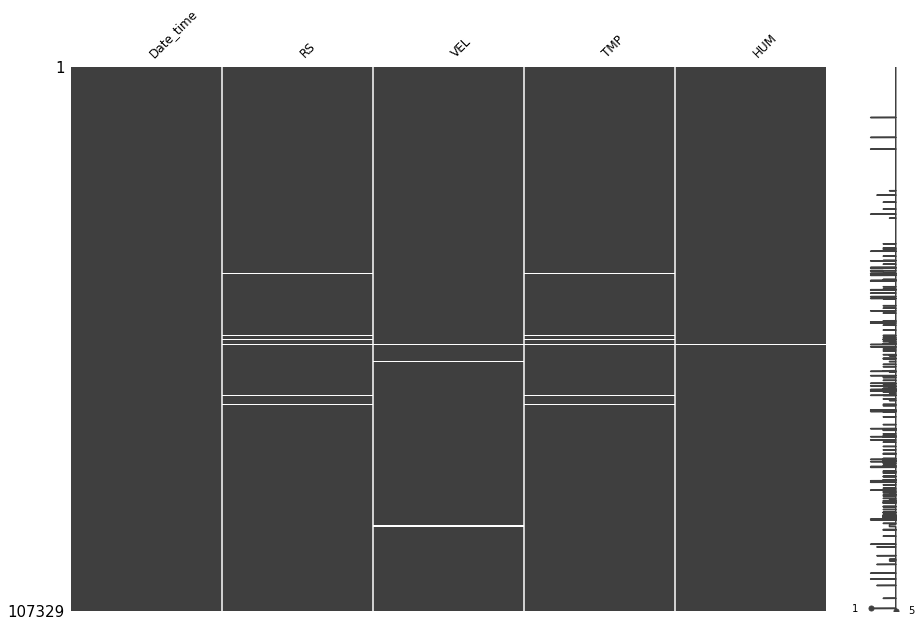

In [37]:
msno.matrix(df_simple,figsize=(15,10), fontsize=12)

In [38]:
df_simple.isna().sum()

Date_time       0
RS            429
VEL          1035
TMP           390
HUM           452
dtype: int64

In [51]:
df_simple['Date_time'] = pd.to_datetime(df_simple['Date_time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_simple.dtypes

Date_time    datetime64[ns]
RS                  float64
VEL                 float64
TMP                 float64
HUM                 float64
dtype: object

In [55]:
df_simple = df_simple.set_index('Date_time')

In [61]:
df2018 = df_simple.loc['2018']

In [76]:
df2018.head()

,RS,VEL,TMP,HUM
Date_time,,,,
2018-01-01 00:00:00,1.10,1.43,10.61,89.96
2018-01-01 01:00:00,0.62,0.27,10.25,86.96
2018-01-01 02:00:00,0.49,0.23,9.89,86.76
2018-01-01 03:00:00,0.89,0.98,9.50,90.40
2018-01-01 04:00:00,0.96,1.80,9.11,87.78


In [62]:
df2018.isna().sum()

RS     1
VEL    1
TMP    2
HUM    2
dtype: int64

In [65]:
df2018 = df2018.fillna(method='backfill')

In [67]:
corr_matrix = df2018.corr()

In [68]:
import seaborn as sns

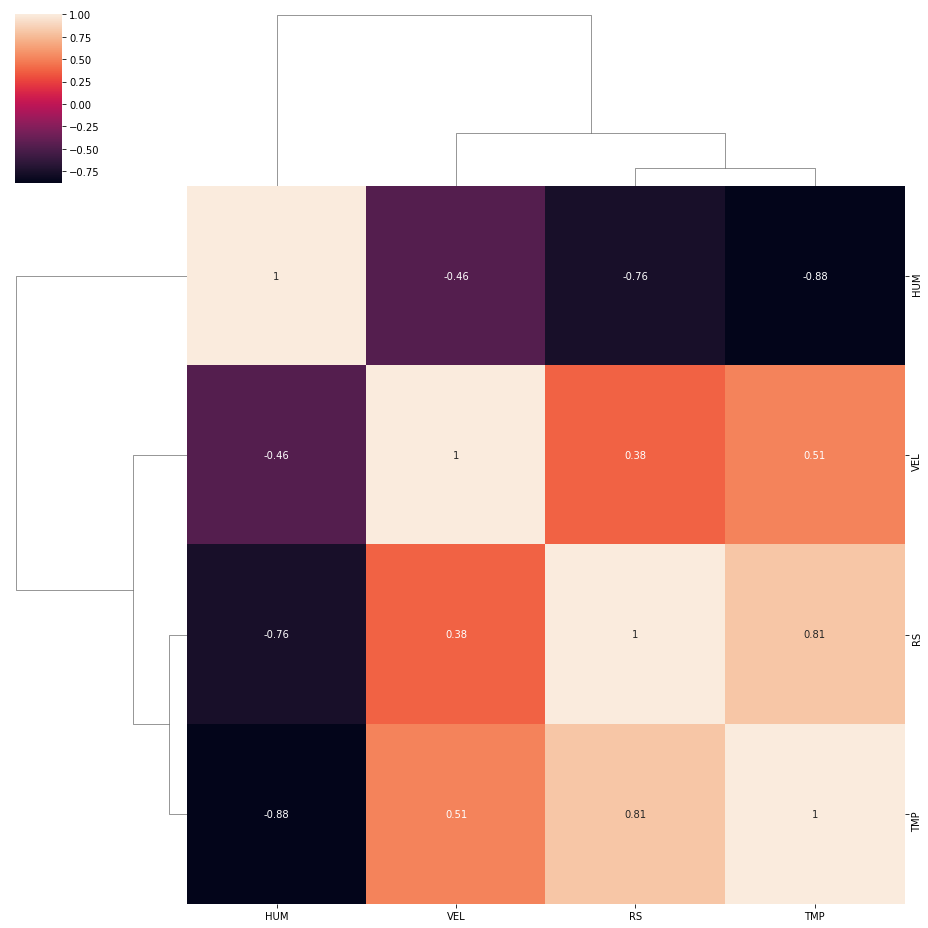

In [69]:
sns.clustermap(corr_matrix,annot=True,figsize=(13,13))

In [71]:
corr_matrix['RS'].sort_values(ascending=False)

RS     1.000000
TMP    0.811943
VEL    0.376321
HUM   -0.760631
Name: RS, dtype: float64

In [81]:
dfDay = df2018.between_time('08:00:00','17:00:00')

In [82]:
dfDay.head()

,RS,VEL,TMP,HUM
Date_time,,,,
2018-01-01 08:00:00,125.56,0.34,8.89,87.28
2018-01-01 09:00:00,143.08,0.64,9.90,83.10
2018-01-01 10:00:00,231.17,0.20,10.56,79.21
2018-01-01 11:00:00,331.68,0.89,11.65,76.64
2018-01-01 12:00:00,250.38,1.29,11.61,78.24


In [83]:
corr_matrix = dfDay.corr()

La correlación con temperatura y humedad se mantiene, pero no con la velocidad del viento.

In [84]:
corr_matrix['RS'].sort_values(ascending=False)

RS     1.000000
TMP    0.664237
VEL    0.035195
HUM   -0.669815
Name: RS, dtype: float64